In [143]:
from some import add_project_root_to_path

add_project_root_to_path()

### Exercise 9.1
Implement a function Fest_8point that estimates a fundamental matrix from eight or more point
correspondences, using the linear algorithm.

In [144]:
import numpy as np 


def Fest_8point(q_1,q_2):
    """
    input: 8 point correspondances such that q_1i corresponds to q_2i 
    q_1: 8 points 
    q_2: 8 points
    """

    B = [(q_i.reshape(-1,1) @ q_j.reshape(1,-1)).flatten() for q_i,q_j in zip(q_2.T,q_1.T) ]

    U,S,VT = np.linalg.svd(B)

    F = VT[-1,:].reshape(3,3)

    return F


### Test your function using the points in Fest_test.npy. Check that your estimated fundamental
### matrix is identical to Ftrue up to scale and numerical error.
### You can load the file using np.load('Fest_test.npy', allow_pickle=True).item()

In [145]:
# Load the data 

test = np.load('../Data/Fest_test.npy',allow_pickle=True).item() 

q1 = test['q1']
q2 = test['q2']
f_true = test['Ftrue']


# Let's test our function 

F_est = Fest_8point(q1,q2)
F_est


array([[-3.07914555e-08,  3.61883689e-06, -5.43583727e-04],
       [ 4.49876682e-06,  2.24402705e-08, -1.51520136e-01],
       [-1.95223414e-03,  1.48295604e-01,  9.77264527e-01]])

### Download TwoImageData.npy (not the car version). As you did last week, find features in both
### images and match them. However, this time do not filter matches by the ratio test, only use cross
### checking as done by cv2.BFMatcher_create(crossCheck=True).
### Visualize the result and confirm that it looks reasonable compared to your expectations.

In [146]:
import cv2 

data = np.load('../Data/TwoImageData.npy',allow_pickle=True).item()

k = data['K']

img1 = data['im1']
img2 = data['im2']


R1 = data['R1']
R2 = data['R2']

t1 = data['t1']
t2 = data['t2']


In [147]:
data

{'im1': array([[17, 17, 14, ..., 19, 18, 20],
        [15, 16, 15, ..., 18, 17, 19],
        [14, 14, 15, ..., 18, 18, 21],
        ...,
        [13, 14, 16, ...,  4,  4,  5],
        [13, 13, 14, ...,  4,  5,  6],
        [12, 13, 14, ...,  6,  6,  5]], dtype=uint8),
 'im2': array([[14, 15, 12, ..., 22, 20, 21],
        [13, 14, 14, ..., 21, 19, 20],
        [13, 12, 13, ..., 19, 20, 22],
        ...,
        [14, 19, 38, ...,  5,  5,  6],
        [27, 56, 90, ...,  5,  6,  7],
        [49, 76, 74, ...,  5,  7,  6]], dtype=uint8),
 'R1': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 'R2': array([[ 9.97063888e-01,  1.21564307e-04,  7.65740684e-02],
        [-1.37753401e-04,  9.99999969e-01,  2.06135565e-04],
        [-7.65740409e-02, -2.16078666e-04,  9.97063874e-01]]),
 't1': array([[0.],
        [0.],
        [0.]]),
 't2': array([[-0.04594547],
        [-0.00017171],
        [ 0.00157051]]),
 'K': array([[1.41448973e+03, 0.00000000e+00, 4.01393651e+02],
       

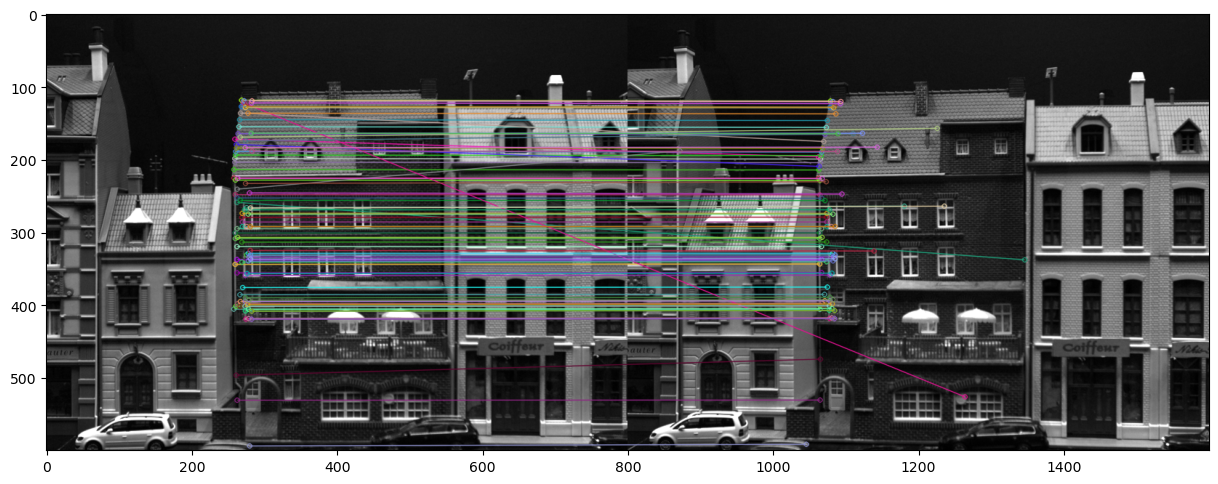

In [148]:
import matplotlib.pyplot as plt

sift = cv2.SIFT_create()


kp1,des1 = sift.detectAndCompute(img1,None)
kp2,des2 = sift.detectAndCompute(img2,None)

bf = cv2.BFMatcher_create(crossCheck=True) # What is cross checking?

matches = bf.match(des1,des2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[500:600],None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)


fig,ax = plt.subplots(1,1,figsize=(15,15))
ax.imshow(img3)
plt.show()


## Exercise 9.3

### Sample eight random matches. This can be done with the following code
#### np.random.choice(matches, 8, replace=False).
#### Use your function Fest_8point to estimate the fundamental matrix from these eight matches.
####  Write a function SampsonsDistance(F, p1, p2) that computes Sampson’s distance.
#### Set points to inliers if their Sampson’s distance is less than 3.84 · 3ˆ2. Explain where this value comes from.
#### Repeat the above steps for the a fixed number of iterations, such as 200.
#### Finally, use Fest_8point to estimate the final fundamental matrix using all inliers of the best model.
####  Run your algorithm on the the images from TwoImageData.npy. Compare your estimated F to
#### Ftrue using the following code:
#### (F*Ftrue).sum() / (np.linalg.norm(F)*np.linalg.norm(Ftrue)).

#### Explain what this code does.

In [149]:
#Sample eight random matches. This can be done with the following code

def get_points(points,matches):
    
    list_kp1 = []
    list_kp2 = []
    for mat in points:
    # Get the matching keypoints for each of the images
        img1_idx = mat.queryIdx
        img2_idx = mat.trainIdx

        # x - columns
        # y - rows
        # Get the coordinates
        x1, y1 = kp1[img1_idx].pt
        x2, y2 = kp2[img2_idx].pt

        # Append to each list
        list_kp1.append([x1, y1])
        list_kp2.append([x2, y2])
    return np.array(list_kp1).T,np.array(list_kp2).T


#random = np.random.choice(matches, 8, replace=False)

random = np.random.choice(matches, 8, replace=False)



In [150]:
def get_all_points(keypoints1, keypoints2, matches):
    # Extract the point coordinates from the matches
    points1 = np.float32([keypoints1[m.queryIdx].pt for m in matches])
    points2 = np.float32([keypoints2[m.trainIdx].pt for m in matches])
    
    return points1.T, points2.T

### Use your function Fest_8point to estimate the fundamental matrix from these eight matches.

In [151]:
from utils.week1 import * 

q1,q2 = get_points(random,matches)
q1 = PiInv(q1)
q2 = PiInv(q2)

F_est = Fest_8point(q1,q2)



### Write a function SampsonsDistance(F, p1, p2) that computes Sampson’s distance 

In [152]:
def SampsonsDIstance(F,p1,p2):
    distance = [(p2_i.T@F@p2_i)**2/((p2_i.T@F)[0]**2 + (p2_i.T@F)[1]**2 + (p1_i.T@F)[0]**2 + (p1_i.T@F)[1]**2) for p1_i,p2_i in zip(p1.T,p2.T) ]
    return distance



### Set points to inliers if their Sampson’s distance is less than 3.84 · 3ˆ2. Explain where this valus comes from.


##### This value corresponds to the CDF threshold for a 95% confidence level for chi-distribution

In [153]:
def get_inliers(F_est, p1,p2):

    inliers = []
    
    d = SampsonsDIstance(F_est, p1,p2)  # Compute Sampson's distance for each pair
    for i, (q1, q2) in enumerate(zip(p1.T, p2.T)):
        if d[i] < 3.84 * 3**2:  # Check if the distance is below the threshold
            inliers.append((q1, q2))  
    return inliers


### Repeat the above steps for the a fixed number of iterations, such as 200.

In [165]:
from utils.week1 import * 



def ransac_F(matches,kp1,kp2):
    best_inliers = []
    best_model = None 

    p1,p2 = get_all_points(kp1,kp2,matches)
    p1,p2 = PiInv(p1),PiInv(p2)

    
    for _ in range(0,500):  
        random = np.random.choice(matches, 8, replace=False)

        q1,q2 = get_all_points(kp1,kp2,random)
   
        q1 = PiInv(q1)
        q2 = PiInv(q2)
       # return p1,p2
        F_est = Fest_8point(q1,q2)
        inliers = get_inliers(F_est,p1,p2)

        if not(best_inliers):  # First iteration
            best_inliers = inliers
            best_model = F_est 

        else:
            if len(inliers)>len(best_inliers):
                best_inliers = inliers 
                best_model = F_est

    return best_model

            


    ##Finally, use Fest_8point to estimate the final fundamental matrix using all inliers of the best model.

In [171]:
F = ransac_F(matches,kp1,kp2)
F

array([[-2.02151529e-06,  1.85700980e-04, -4.44299384e-02],
       [-1.76222037e-04,  5.18715309e-06, -1.18314147e-01],
       [ 4.29608557e-02,  1.13178074e-01,  9.84567299e-01]])

F_true

In [167]:
F_true = np.array([[-1.94029315e-08, -1.26535831e-06,  1.42215454e-05],
       [-1.74360791e-06, -3.16893157e-07, -1.20302873e-03],
       [-5.87867477e-05,  2.78146673e-03, -1.01653094e-01]])
F_true


array([[-1.94029315e-08, -1.26535831e-06,  1.42215454e-05],
       [-1.74360791e-06, -3.16893157e-07, -1.20302873e-03],
       [-5.87867477e-05,  2.78146673e-03, -1.01653094e-01]])

### Cosine similarity 

In [172]:
(F*F_true).sum()/(np.linalg.norm(F)*np.linalg.norm(F_true))

-0.979665915911388